In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df=pd.read_csv('/content/Iris.csv')

In [44]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
df.shape

(150, 6)

In [46]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [47]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


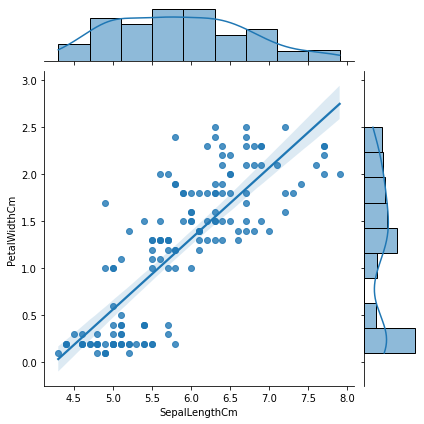

In [48]:
sns.jointplot(df['SepalLengthCm'],df['PetalWidthCm'],data=df,kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


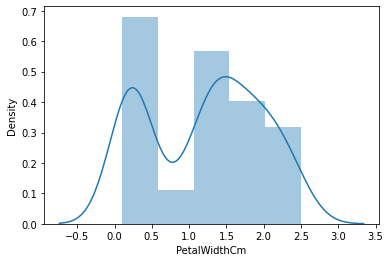

In [49]:
sns.distplot(df['PetalWidthCm'])

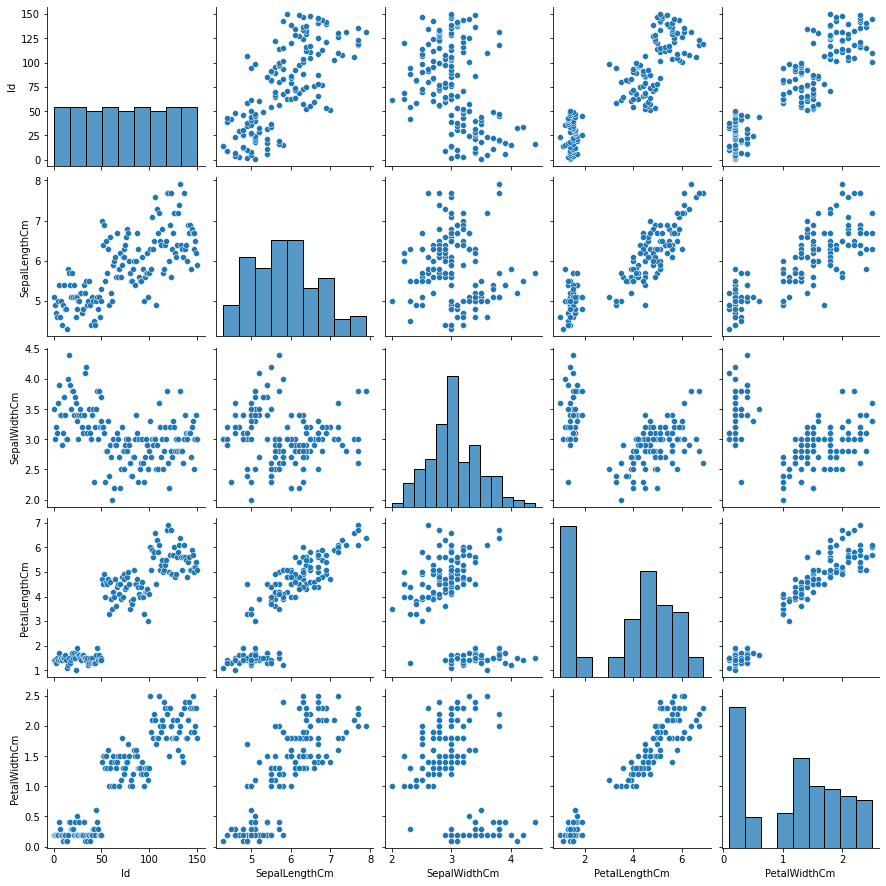

In [50]:
sns.pairplot(data=df)

In [51]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
df.drop('Id',axis=1,inplace=True)

In [62]:
from sklearn.preprocessing import LabelEncoder 

In [59]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [63]:
label_encoder=LabelEncoder()

labels=label_encoder.fit_transform(df['Species'])

df['Target']=labels

df.drop('Species',axis=1,inplace=True)

In [65]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,NaN,NaN,NaN
1,4.9,3.0,1.4,0.2,NaN,NaN,NaN
2,4.7,3.2,1.3,0.2,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2,NaN,NaN,NaN
4,5.0,3.6,1.4,0.2,NaN,NaN,NaN


In [67]:
x=df.drop(['Target'],axis=1)

In [68]:
y=df['Target']

In [69]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [70]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split 

In [72]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [75]:
X_train.value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
4.9            3.1           1.5            0.1             2
5.8            2.7           5.1            1.9             2
5.9            3.0           4.2            1.5             1
                             5.1            1.8             1
6.5            3.0           5.2            2.0             1
                                                           ..
5.4            3.4           1.5            0.4             1
               3.0           4.5            1.5             1
5.3            3.7           1.5            0.2             1
5.2            4.1           1.5            0.1             1
7.9            3.8           6.4            2.0             1
Length: 118, dtype: int64

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
reg=LogisticRegression()

reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [78]:
y_pred=reg.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [81]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [82]:
accuracy_score(y_test,y_pred)

1.0